In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from scipy.stats import norm as norm

In [3]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import subplots
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix

In [4]:
#Upload Dataset
df = pd.read_csv('https://raw.githubusercontent.com/b-pinter/Statistical-Modeling-Final/main/pharyngitis.csv')

In [86]:
#Pre-processing and cleaning
#Data Came cleaned (as seen above), and did not need any cleaning due to no nans being present in the dataset.
df.head()

,number,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
0,2000,7.0,0,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2001,11.7,1,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2002,5.6,1,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2003,6.0,1,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2004,5.2,0,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='age_y', ylabel='Count'>

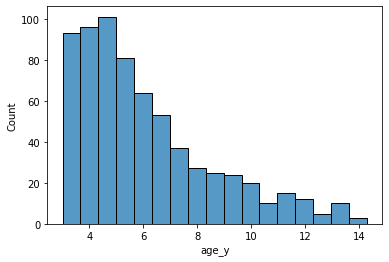

In [6]:
#Visual 1
sns.histplot(data = df, x = 'age_y')

[Text(0.5, 0, 'Temperature, in celcius'),
 Text(0.5, 1.0, 'Temperature of patients')]

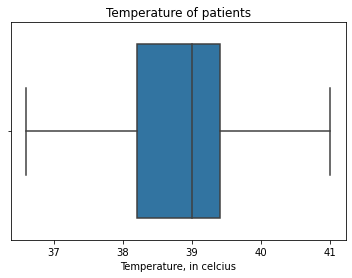

In [7]:
#Visual 2
temp = sns.boxplot(data = df, x = 'temperature')
temp.set(xlabel = 'Temperature, in celcius', title = 'Temperature of patients')

In [11]:
#Prediction 1
#We will be predicting of someone passing/failing a radt test using knn.
#Outcome will be demonstrated on a confusion matrix with a accuracy score.

In [49]:
#Confirming no nans present
df_noNan = df.dropna()

In [50]:
#X and Y
x = df_noNan.drop(columns = 'radt')
y = df_noNan['radt']

<AxesSubplot:xlabel='count', ylabel='radt'>

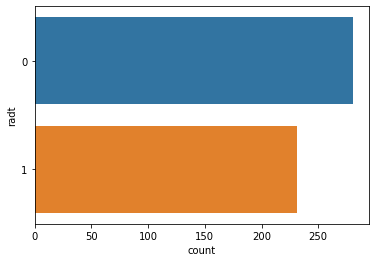

In [60]:
#Visual of what we will be predicting
sns.countplot(y="radt", data=df_noNan)

In [54]:
#Making model
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size= 0.2,
                                                  shuffle= True, #shuffle the data to avoid bias
                                                  random_state= 42)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [55]:
scaler= Normalizer().fit(x_train) 
normalized_x_train= scaler.transform(x_train)
normalized_x_test= scaler.transform(x_test) 

In [56]:
k = 5 
#initialize model and fit it
knn = KNeighborsClassifier(k)
knn.fit(normalized_x_train, y_train)
#make predictions
y_pred = knn.predict(normalized_x_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Y Prediction')

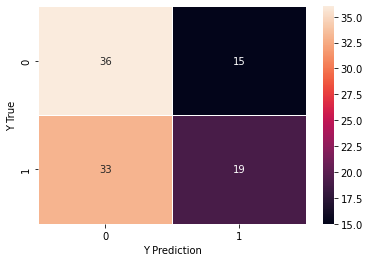

In [58]:
sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")

In [59]:
#It's just ok, around 53% accuracy
accuracy_score(y_test, y_pred)
#Our model is very good at giving true negative, meaning someone who took the radt test does not have strep throat.
#Our model is very bad a predicting true positive, and often instead gives false negative results to occur.
#I think our model is bad at predicting trust positive due to its large knn value, and it's inability to come to correct answers based off all predictors present.

0.5339805825242718

In [18]:
#Prediction 2
#We will be using multiple linear regression to determine age of a patient based on various facors.
#We will then be using a ridge regression to determine which of these predictors is the best at making a good MSE.

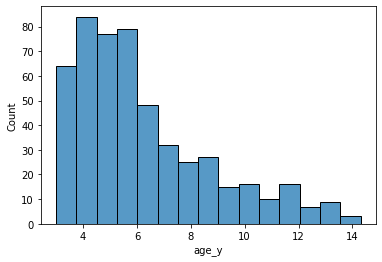

In [65]:
#Histogram showing distribution of age. (Target)
sns.histplot(data=df_noNan, x="age_y")
plt.show()

In [63]:
#Model, multiple linear regression
design = MS(['temperature','radt','pain'])
design = design.fit(df_noNan)
X_1 = design.transform(df_noNan)
y_1 = df_noNan['age_y']
model= sm.OLS(y_1, X_1)
result= model.fit()
summarize(result)
#Temperature and Pain seem to do the best at determining the age of someone. Radt on the other hand is a very poor predictor.

,coef,std err,t,P>|t|
intercept,23.4919,5.018,4.681,0.000
temperature,-0.4700,0.128,-3.665,0.000
radt,0.1010,0.218,0.463,0.644
pain,1.0587,0.306,3.465,0.001


In [64]:
#R-Squared Value
print(result.rsquared)

0.05724704359065169


In [79]:
#MSE
model_sk = sklearn_sm(sm.OLS,
                      MS(X_1.columns))
cv_results = cross_validate(model_sk, X_1, y_1, cv = len(X_1))
cv_results['test_score'].mean()

6.056800852405469

In [71]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [81]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler.fit(X_1)
X_scale = scaler.transform(X_1)
(X_train,
 X_test,
 Y_train,
 Y_test) = train_test_split(np.asarray(X_scale),
                            y_1,
                            test_size=0.2)

In [82]:
ridge = Ridge()
coefs = []
MSEs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test)
    MSEs.append(mean_squared_error(Y_test, pred))

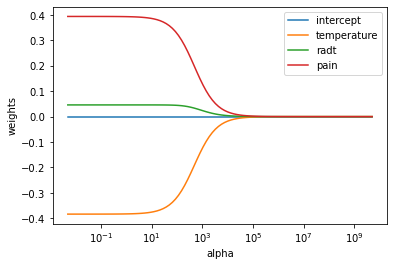

In [83]:
plt.plot(alphas, coefs, label = X_1.columns)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend()

Text(0, 0.5, 'MSE')

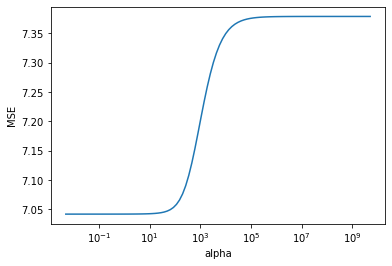

In [84]:
plt.plot(alphas, MSEs)
plt.xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')

In [ ]:
#Cross-Validation